In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [2]:

def categorize_features(x,selected_features):
    if x in selected_features:
        return x.lower()
    elif x in [None,np.NAN,np.NaN,np.nan]:
        return 'unknown'
    else:
        return "other"
def simplyfying_features(column,data,no_selected):
    selected_features = data[column].value_counts().sort_values(ascending=False).head(no_selected).index
    return selected_features

def detect_skewed_features(dataset):
    features = dataset.select_dtypes(include=['int','float']).columns
    set_f = dataset[features].skew(axis=0, skipna = True).sort_values(ascending=False)
    return set_f[set_f>2].index

In [3]:
X = pd.read_csv('Train_values.csv')
Y = pd.read_csv('Train_labels.csv')
test  = pd.read_csv('Test_values.csv')

train = pd.merge(X,Y,on='id')

- Features that are abs(skew) > 0.5 should be log transformed. Log transform will help lessen the impact of outliers.

c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_private', ylabel='Density'>

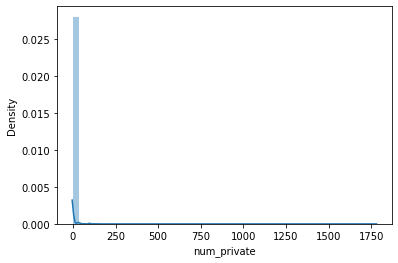

In [4]:
sns.distplot(train['num_private'])

In [5]:
train[train['num_private']>0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
469,43604,0.0,3/23/2011,Unhcr,288,REDESO,38.517002,-5.591650,Kwa Mazenyeko,39,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
476,27523,20.0,2/24/2011,Private,-32,Priva,38.979944,-7.954320,Kiambwe,5,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
519,72238,0.0,3/13/2011,Tardo,1794,Tardo,38.245052,-4.661949,Kwa Mzee Hamisi,45,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
527,26851,0.0,3/20/2011,Sabemo,1665,Chamavita,38.345578,-4.749421,Kwa Mzee Sau,6,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
608,71658,0.0,3/25/2011,District Council,289,Handeni Trunk Main(,38.545166,-5.257279,Kwa Samakudu,3,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58924,10750,0.0,3/20/2011,Sabemo,1824,Chamavita,38.334293,-4.746389,Kwesim,6,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
58943,24894,50.0,3/30/2011,District Council,654,Handeni Trunk Main(,38.186842,-5.577446,Kwedibilika,4,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
58974,59650,0.0,2/25/2011,Iran Gover,117,IRAN GOVERN,38.866455,-6.822525,Rafsanjan Shuleni,120,...,soft,good,insufficient,insufficient,river,river/lake,surface,hand pump,hand pump,non functional
59045,72611,0.0,3/11/2011,District Council,2,DWE,38.881740,-5.627174,Kwamkwayu,34,...,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional


In [6]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


- maybe necessary to remove construction year.

In [7]:
skew = train.skew()
list_log_transform = skew[abs(skew)>2].index

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1004\3976356785.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = train.skew()


### The categorical feature.

- num_private feature seems messed up. (small variance, large outliers.) => highly skewed.
- construction_year have year 0 => messed up values. 
- gps_height, longitude, latitude have negative values. 
- population, gps_height, amount_tsh seems skewed.
- region_code, district_code should be categorical variables.
- construction_year should be datetime.

### The numerical feature.

- Fixing up 'Unknown' and 'Other' values. If unknown then value is nan. If other then value is ticked. 
- If the value is selected then the rows contain that value will remain the same. Null values will stay the same as well. Non-chosen values are converted into 'other'
- Choosing the number of values to be onehot-encoded (require that not making the dataset imbalanced)
- Onehot-encode them. 
- Fixing outliers.

<AxesSubplot:ylabel='population'>

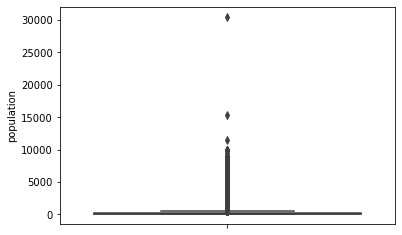

In [8]:
sns.boxplot(y=train['population'])

we should drop some serious outliers.

21381


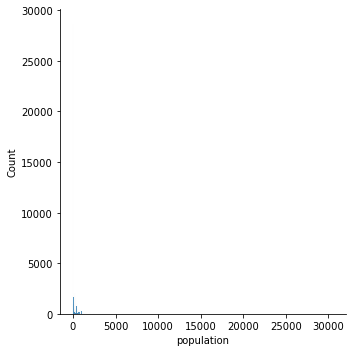

In [9]:
print((train['population'] == 0).sum())
sns.displot(train['population'])
plt.show()

In [10]:
np.quantile(train['population'],[0.95])

array([680.])

- There are too many 0 values with this field.
- There are definitely outliers that need to be cleaned (values > q95,q90 need to be cleaned)

In [11]:
unique_train = train['region_code'].value_counts().index.sort_values(ascending=False)
unique_test = test['region_code'].value_counts().index.sort_values(ascending=False)
f = []
for i in unique_train:
    if i not in unique_test:
        f.append(i)
print(f)        

[40]


- There aren't many region_code that test set has but training set doesn't.
- Try: 
    - Leave it as numerical.
    - Transform it into number of values count in the dataset. => the popularity of the value in the dataset.
    - Transform all values that the training set haven't seen into 0. (recommended)

In [12]:
unique_train = train['district_code'].value_counts().index
unique_test = test['district_code'].value_counts().index
f = []
for i in unique_train:
    if i not in unique_test:
        f.append(i)
print(f) 

[]


- No values of district code that available in the test set but isnt available in the training set. 

20438


c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gps_height', ylabel='Density'>

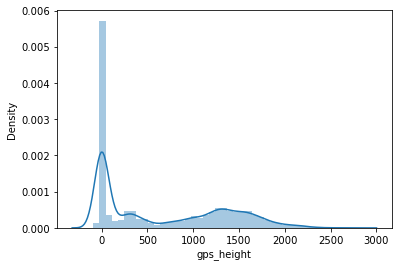

In [13]:
print((train['gps_height'] == 0 ).sum())
sns.distplot(train['gps_height'])

- There are also a lot of 0 values. Do not know whether this is common or it represents null values.

41639


c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_tsh', ylabel='Density'>

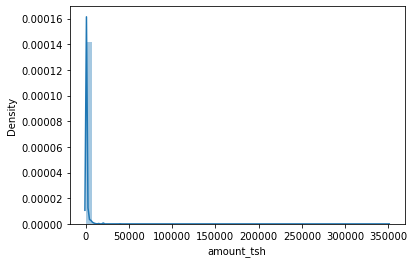

In [14]:
print((train['amount_tsh'] == 0 ).sum())
sns.distplot(train['amount_tsh'])

- This feature should be binned or otherwise dropped since it is way too skewed, and it has too many 0 values.

- num_private has too many 0 values, should be dropped because it has too little variance.

In [15]:
train.select_dtypes(include='object').isna().sum()

date_recorded                0
funder                    3635
installer                 3655
wpt_name                     0
basin                        0
subvillage                 371
region                       0
lga                          0
ward                         0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

- There are a lot of 0 values in this column. It might suggests that the data has some systematic error, or they simply are null. => We should either drop 0 values, or drop this year column.

### CHECK FOR ERRORS, OVERLAPPING VALUES IN THESE MULTI-VALUE COLUMNS.

In [16]:
train['wpt_name'].value_counts().sort_values(ascending=False).head(30)

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Shule               152
Sekondari           146
Muungano            133
Mkombozi            111
Madukani            104
Mbugani              94
Hospital             94
Upendo               93
Kituo Cha Afya       90
Mkuyuni              88
Umoja                84
Center               83
Ccm                  81
Kisimani             78
Ofisi Ya Kijiji      76
Mtakuja              76
Tankini              73
Bwawani              66
Songambele           66
Maendeleo            64
Name: wpt_name, dtype: int64

- Installer has many values that im not certain about its validity. (Wrong spelling, nonsense values,..)
- Subvillage has many village that was divided into smaller scale. Whats weired is that it is in the same region but different subvillage.
    - Does subvillage and region affect status code? 
- Construction year has year 0 => remove.
- management and management_group has 'other' value.
- management has value 'other_school' and 'school'.
- 3 extraction cols has value unknown.
- payment, payment_type has both unknown and other.
- water_quality, quality,quantity,quantity_group,source,source_class has value 'unknown'


In [17]:
train['subvillage'].value_counts().sort_values(ascending=False)

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Mwamazengo        1
Bitati            1
Kidimba           1
Kidokwe           1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

In [18]:
train['wpt_name'].value_counts().index

Index(['none', 'Shuleni', 'Zahanati', 'Msikitini', 'Kanisani', 'Bombani',
       'Sokoni', 'Ofisini', 'School', 'Shule Ya Msingi',
       ...
       'Kwa Mzee Daniel Chilubi', 'Kwa Msosa Kalanje', 'Kwa Milanzi',
       'Kwa Kwimila', 'Ponjolo', 'Kwa Medadi', 'Kwa Kubembeni',
       'Shule Ya Msingi Milanzi', 'Funua', 'Kwa Mzee Lugawa'],
      dtype='object', length=37400)

- Way too many values for modelling => Solution:
    - A dominant feature and non dominant feature.
    - Count of value in the dataset.


- source and source type is like payment and payment_type. (half of them equal)
- waterpoint_type and waterpoint_type_group is similar. (almost equal)
- payment and payment type is so similar. Could be just extension of one another.(half of them equal)
- water_quality and quality_group is so similar. Could be just extension of one another.(these columns does not equal)
- quantity and quantity_group is so similar. Could be just extension of one another. (these columns equal, delete one.)
- management and scheme_management is similar. (almost equal)
- extraction_type, extraction_type_group, extraction_type_class has similar unique values.(half equal)

- There are many duplicated values in these 2 features. Maybe one hot unique values of the 2 then count number of appearance among these 2 as values for each columns.
- If there's a difference between the 2, create new features as identifiers.

- payment has NaN value called 'unknown'
- wpt_name has NaN value called'none' value.

- scheme_management should be converted to lowercase.

- We can convert all 'other-...' values into 'other'
- We can combine all unique values of these 3 fields into one hot coding => then count the number of features among the 3 that have the value. 

- recorded_by only have 1 value => drop

- Drop scheme_name because too many null values.
- Other features have less than 10% null values so we should be able to impute properly.

In [19]:
def one_hot_multi_cols(train,test,cols):

    list_unique = np.unique(np.reshape(train[cols].values,-1))
    train_l = []
    test_l = []
    for col in cols:
        train_k = []
        test_k = []
        for i in list_unique:
            train_k.append(train.apply(lambda x:1 if x[col] == i else 0, axis=1))
            test_k.append(test.apply(lambda x:1 if x[col] == i else 0, axis=1))
        train_l.append(train_k)
        test_l.append(test_k)
    train_l = (np.sum(np.array(train_l),axis=0))
    train_l = train_l.reshape((np.array(train_l).shape[1],np.array(train_l).shape[0]))
    l_train_pd = pd.DataFrame(train_l,columns=list_unique)
    train = pd.concat([train,l_train_pd],axis=1)
    
    test_l = (np.sum(np.array(test_l),axis=0))
    test_l = test_l.reshape((np.array(test_l).shape[1],np.array(test_l).shape[0]))
    l_test_pd = pd.DataFrame(test_l,columns=list_unique)
    test = pd.concat([test,l_test_pd],axis=1)
    return train,test

list_cols_onehot = [['source','source_type'],['payment','payment_type'],['extraction_type', "extraction_type_group", 'extraction_type_class']]
len_list = 0
unique_vals = []
for i in list_cols_onehot:
    no_list = np.unique(np.reshape(train[i].values,-1))
    len_list = len_list + len(no_list)
    unique_vals.extend(no_list)
print(len_list+train.shape[1])
print(unique_vals)

88
['borehole', 'dam', 'hand dtw', 'lake', 'machine dbh', 'other', 'rainwater harvesting', 'river', 'river/lake', 'shallow well', 'spring', 'unknown', 'annually', 'monthly', 'never pay', 'on failure', 'other', 'pay annually', 'pay monthly', 'pay per bucket', 'pay when scheme fails', 'per bucket', 'unknown', 'afridev', 'cemo', 'climax', 'gravity', 'handpump', 'india mark ii', 'india mark iii', 'ksb', 'mono', 'motorpump', 'nira/tanira', 'other', 'other - mkulima/shinyanga', 'other - play pump', 'other - rope pump', 'other - swn 81', 'other handpump', 'other motorpump', 'rope pump', 'submersible', 'swn 80', 'walimi', 'wind-powered', 'windmill']


In [20]:
train_engineered = train.copy()
test_engineered = test.copy()

num_features = train_engineered.select_dtypes(include=['float64','int64']).columns
cat_features = train_engineered.select_dtypes(include=['object'])

#drop outliers on the training set.
# train_engineered = train_engineered.drop(train[train['amount_tsh']>250000].index,axis=0)
# train_engineered = train_engineered.drop(train[train['population']>15000].index,axis=0)

#all features to their correct types.
train_engineered['date_recorded'] = pd.to_datetime(train_engineered['date_recorded'])
test_engineered['date_recorded'] = pd.to_datetime(test_engineered['date_recorded'])
train_engineered['public_meeting'] = train_engineered['public_meeting'].astype(bool)
test_engineered['public_meeting'] = test_engineered['public_meeting'].astype(bool)

#drop low variance features.
train_engineered = train_engineered.drop(['recorded_by'],axis=1)
test_engineered = test_engineered.drop(['recorded_by'],axis=1)

#drop columns with high NaN values ratio.
train_engineered = train_engineered.drop(['scheme_name','construction_year','num_private'],axis=1)
test_engineered = test_engineered.drop(['scheme_name','construction_year','num_private'],axis=1)


#deleting identical/almost identical columns
train_engineered = train_engineered.drop(['quantity_group','scheme_management','waterpoint_type_group'],axis=1)
test_engineered = test_engineered.drop(['quantity_group','scheme_management','waterpoint_type_group'],axis=1)

print(train_engineered.shape)
print(test_engineered.shape)

(59400, 34)
(14850, 33)


### Before onehot coding, use imputation.
### Sklearn one hot coding also 

### Converting NaN values into NaN


In [21]:
train_engineered['funder'] = train_engineered['funder'].replace({'0':np.NaN})
train_engineered['installer'] = train_engineered['installer'].replace({'0':np.NaN,'-':np.NaN})
train_engineered['wpt_name'] = train_engineered['wpt_name'].replace({'none':np.NaN})
train_engineered['subvillage'] = train_engineered['subvillage'].replace({'none':np.NaN})
train_engineered['water_quality'] = train_engineered['water_quality'].replace({'unknown':np.NaN})
train_engineered['quality_group'] = train_engineered['quality_group'].replace({'unknown':np.NaN})
train_engineered['quantity'] = train_engineered['quantity'].replace({'unknown':np.NaN})
train_engineered['source_class'] = train_engineered['source_class'].replace({'unknown':np.NaN})

### Imputing values into NaN values.

### One hot all categorical features using sklearn

In [22]:
cols_one_hot = ['funder', 'installer', 'wpt_name', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'water_quality','quality_group', 'quantity', 'waterpoint_type']
train_engineered = pd.concat([train_engineered,pd.get_dummies(train_engineered[cols_one_hot])],axis=1)
train_engineered = train_engineered.drop(cols_one_hot,axis=1)
train_engineered.shape

test_engineered = pd.concat([test_engineered,pd.get_dummies(test_engineered[cols_one_hot])],axis=1)
test_engineered = test_engineered.drop(cols_one_hot,axis=1)
test_engineered.shape

(14850, 23505)

Till now, only the cols_one_hot can not have null values.

### Selecting values of each features that need onehot-coding then usee sklearn. 

In [23]:
#one-hot-coding multiple columns in list_cols_onehot
train_engineered['source'] = train_engineered['source'].replace({'unknown':np.NaN})
train_engineered['payment'] = train_engineered['payment'].replace({'unknown':np.NaN})
train_engineered['payment_type'] = train_engineered['payment_type'].replace({'unknown':np.NaN})

train_engineered['source'] = simplyfying_features('source',train_engineered,8)
train_engineered['payment'] = simplyfying_features('payment',train_engineered,8)
train_engineered['payment_type'] = simplyfying_features('payment_type',train_engineered,8)

list_cols_onehot = [['source','source_type'],['payment','payment_type'],['extraction_type', "extraction_type_group", 'extraction_type_class']]
train_engineered, test_engineered = one_hot_multi_cols(train_engineered,test_engineered,['source','source_type'])
train_engineered, test_engineered = one_hot_multi_cols(train_engineered,test_engineered,['payment','payment_type'])
train_engineered, test_engineered = one_hot_multi_cols(train_engineered,test_engineered,['extraction_type', "extraction_type_group", 'extraction_type_class'])

ValueError: Length of values (8) does not match length of index (59400)

### Handle missing values.

In [ ]:
train_engineered.shape

(59400, 181)

In [ ]:
test_engineered.shape

(14850, 82)